## Естественный язык и математика

#### Лексиконы
Лексиконы можно определить как словарь человека, языка или отрасли знаний. Проще говоря, лексикон можно рассматривать как словарь терминов, которые называются лексемами . Например, термины, используемые практикующими врачами, можно рассматривать как лексикон их профессии. Например, при попытке построить алгоритм для преобразования физического рецепта, выданного врачами, в электронную форму, лексикон будет состоять в основном из медицинских терминов. Лексиконы используются для самых разных задач НЛП, где они представлены в виде списка слов или словарного запаса. Разговоры в соответствующей области ведутся их соответствующей лексикой. В этой главе мы рассмотрим шаги и процессы, связанные с созданием словаря естественного языка.

#### Фонемы, графемы и морфемы
Прежде чем мы начнем рассматривать шаги по созданию словарного запаса, нам нужно понять фонемы, графемы и морфемы:

Фонемы можно рассматривать как звуки речи, издаваемые ртом или звуковой единицей, которые могут отличать одно слово от другого в языке.

Графемы — это группы букв размером один или несколько, которые могут представлять эти отдельные звуки или фонемы. Слово « ложка » состоит из пяти букв, которые на самом деле представляют четыре фонемы, обозначаемые графемами s , p , oo и n .

Морфема – это наименьшая значимая единица языка.

#### Архитектуры Bag-of-Words
Очень интуитивный подход к представлению документа заключается в использовании частоты слов в этом конкретном документе. Именно это и делается в рамках подхода BoW.

In [13]:
import warnings

warnings.filterwarnings('ignore')

In [39]:
# произведём импорт библиотек:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

import re

from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kasutaja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kasutaja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Возьмём список предложений:
sentences = ["We are reading about Natural Language Processing Here",
"Natural Language Processing making computers comprehend language data",
"The field of Natural Language Processing is evolving everyday"]

In [4]:
# создадим обьект pandas "Series"
corpus = pd.Series(sentences)
corpus

0    We are reading about Natural Language Processi...
1    Natural Language Processing making computers c...
2    The field of Natural Language Processing is ev...
dtype: object

### Data preprocessing

Произведём предобработку текста

In [6]:
def text_clean(corpus, keep_list):
    '''
    Purpose : Function to keep only alphabets, digits and certain words (punctuations, qmarks, tabs etc. removed)
    
    Input : Takes a text corpus, 'corpus' to be cleaned along with a list of words, 'keep_list', which have to be retained
            even after the cleaning process
    
    Output : Returns the cleaned text corpus
    
    '''
    cleaned_corpus = pd.Series()
    for row in corpus:
        qs = []
        for word in row.split():
            if word not in keep_list:
                p1 = re.sub(pattern='[^a-zA-Z0-9]',repl=' ',string=word)
                p1 = p1.lower()
                qs.append(p1)
            else : qs.append(word)
        cleaned_corpus = cleaned_corpus.append(pd.Series(' '.join(qs)))
    return cleaned_corpus

In [7]:
def stopwords_removal(corpus):
    wh_words = ['who', 'what', 'when', 'why', 'how', 'which', 'where', 'whom']
    stop = set(stopwords.words('english'))
    for word in wh_words:
        stop.remove(word)
    corpus = [[x for x in x.split() if x not in stop] for x in corpus]
    return corpus

In [8]:
def lemmatize(corpus):
    lem = WordNetLemmatizer()
    corpus = [[lem.lemmatize(x, pos = 'v') for x in x] for x in corpus]
    return corpus

In [9]:
def stem(corpus, stem_type = None):
    if stem_type == 'snowball':
        stemmer = SnowballStemmer(language = 'english')
        corpus = [[stemmer.stem(x) for x in x] for x in corpus]
    else :
        stemmer = PorterStemmer()
        corpus = [[stemmer.stem(x) for x in x] for x in corpus]
    return corpus

In [10]:
def preprocess(corpus, keep_list, cleaning = True, stemming = False, stem_type = None, lemmatization = False, remove_stopwords = True):
    '''
    Purpose : Function to perform all pre-processing tasks (cleaning, stemming, lemmatization, stopwords removal etc.)
    
    Input : 
    'corpus' - Text corpus on which pre-processing tasks will be performed
    'keep_list' - List of words to be retained during cleaning process
    'cleaning', 'stemming', 'lemmatization', 'remove_stopwords' - Boolean variables indicating whether a particular task should 
                                                                  be performed or not
    'stem_type' - Choose between Porter stemmer or Snowball(Porter2) stemmer. Default is "None", which corresponds to Porter
                  Stemmer. 'snowball' corresponds to Snowball Stemmer
    
    Note : Either stemming or lemmatization should be used. There's no benefit of using both of them together
    
    Output : Returns the processed text corpus
    
    '''
    
    if cleaning == True:
        corpus = text_clean(corpus, keep_list)
    
    if remove_stopwords == True:
        corpus = stopwords_removal(corpus)
    else :
        corpus = [[x for x in x.split()] for x in corpus]
    
    if lemmatization == True:
        corpus = lemmatize(corpus)
        
        
    if stemming == True:
        corpus = stem(corpus, stem_type)
    
    corpus = [' '.join(x) for x in corpus]        

    return corpus

In [11]:
common_dot_words = ['U.S.', 'Mr.', 'Mrs.', 'D.C.']

In [14]:
# preprocessing with lemmatization
preprocessed_corpus = preprocess(corpus, \
                                 keep_list = common_dot_words, stemming = False, \
                                 stem_type = None, lemmatization = True, \
                                 remove_stopwords = True)
preprocessed_corpus

['read natural language process',
 'natural language process make computers comprehend language data',
 'field natural language process evolve everyday']

In [17]:
# build vocabulary
set_of_words = set()
for sentence in preprocessed_corpus:
    for word in sentence.split():
        set_of_words.add(word)
vocab = list(set_of_words)
print(vocab)

['data', 'make', 'evolve', 'process', 'field', 'comprehend', 'language', 'everyday', 'computers', 'natural', 'read']


In [16]:
# fetch the position/index of each token in the vocabulary
position = {}
for i, token in enumerate(vocab):
    position[token] = i
print(position)

{'data': 0, 'make': 1, 'evolve': 2, 'process': 3, 'field': 4, 'comprehend': 5, 'language': 6, 'everyday': 7, 'computers': 8, 'natural': 9, 'read': 10}


Create a placeholder matrix for holding the BoW. Attention: the shape of the matrix is (number of sentences * length of vocabulary), as illustrated in the following code snippet

Создайте матрицу-заполнитель для хранения BoW. Внимание: форма матрицы ( количество предложений * длина словарного запаса ), как показано в следующем фрагменте кода :

In [18]:
bow_matrix = np.zeros((len(preprocessed_corpus), len(vocab)))

Увеличьте позиционный индекс каждого слова, 1если оно встречается в предложении, как показано в следующем фрагменте кода:

In [21]:
for i, preprocessed_sentence in enumerate(preprocessed_corpus):
    for token in preprocessed_sentence.split():
        bow_matrix[i][position[token]] = \
                            bow_matrix[i][position[token]] + 1

In [22]:
# the final BoW
bow_matrix

array([[0., 0., 0., 2., 0., 0., 2., 0., 0., 2., 2.],
       [2., 2., 0., 2., 0., 2., 4., 0., 2., 2., 0.],
       [0., 0., 2., 2., 2., 0., 2., 2., 0., 2., 0.]])

#### Понимание базового CountVectorizer
CountVectorizer— это инструмент, предоставляемый библиотекой sklearn or scikit-learn в Python, который экономит все усилия, выполненные ранее, и предоставляет интерфейсы прикладного программирования (API), которые удобно помогают в построении модели BoW.

Он преобразует список текстовых документов в матрицу таким образом, чтобы каждая запись в матрице соответствовала количеству определенного токена в соответствующих предложениях.

Создать экземпляр CountVectorizer и подать ему данные можно следующим образом:

In [25]:
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(preprocessed_corpus)

print(vectorizer.get_feature_names_out())
print(bow_matrix.toarray())

['comprehend' 'computers' 'data' 'everyday' 'evolve' 'field' 'language'
 'make' 'natural' 'process' 'read']
[[0 0 0 0 0 0 1 0 1 1 1]
 [1 1 1 0 0 0 2 1 1 1 0]
 [0 0 0 1 1 1 1 0 1 1 0]]


### Готовые функции, предлагаемые CountVectorizer

#### Готовый словарь и поддержка n-грамм
CountVectorizer предлагает большую гибкость с точки зрения использования предварительно созданного словаря слов вместо создания словаря на основе данных. Он также предоставляет варианты токенизации текста, а также удаление стоп-слов. 

In [30]:
vectorizer_ngram_range = CountVectorizer(analyzer='word', ngram_range=(1, 3))
bow_matrix_ngram = vectorizer_ngram_range.fit_transform(preprocessed_corpus)

print(vectorizer_ngram_range.get_feature_names_out())
print('\n', bow_matrix_ngram.toarray())

['comprehend' 'comprehend language' 'comprehend language data' 'computers'
 'computers comprehend' 'computers comprehend language' 'data' 'everyday'
 'evolve' 'evolve everyday' 'field' 'field natural'
 'field natural language' 'language' 'language data' 'language process'
 'language process evolve' 'language process make' 'make' 'make computers'
 'make computers comprehend' 'natural' 'natural language'
 'natural language process' 'process' 'process evolve'
 'process evolve everyday' 'process make' 'process make computers' 'read'
 'read natural' 'read natural language']

 [[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 0 0 2 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0]]


Как видно из предыдущего примера, мы изменили параметр ngram_range, чтобы он соответствовал униграммам, биграммам и триграммам. Если вы внимательно посмотрите, девятая фраза с конца — это natural language process -триграмма, и она встречается один раз в каждом предложении. Следовательно, соответствующий ему столбец содержит значения 1, 1 и 1 соответственно, как и следовало ожидать.

In [33]:
vectorizer_max_features = CountVectorizer(analyzer='word', ngram_range=(1,3), max_features = 6)
bow_matrix_max_features = vectorizer_max_features.fit_transform(preprocessed_corpus)
 
print(vectorizer_max_features.get_feature_names_out())
print('\n', bow_matrix_max_features.toarray())

['language' 'language process' 'natural' 'natural language'
 'natural language process' 'process']

 [[1 1 1 1 1 1]
 [2 1 1 1 1 1]
 [1 1 1 1 1 1]]


Этот пример показывает, что были выбраны только шесть наиболее часто встречающихся n-грамм среди униграмм, биграмм или триграмм в корпусе, поскольку значение атрибута max_featuresбыло установлено равным 6.

#### Пороги Min_df и Max_df
Теперь, когда мы ясно понимаем, как max_features помогает ограничению словарного запаса, нам также необходимо понять, что в верхней части этого ограниченного словарного запаса будут находиться термины или фразы, которые очень часто встречаются в рассматриваемом текстовом корпусе. Эти фразы могут очень часто встречаться в отдельном документе или могут присутствовать почти во всех документах корпуса и могут не нести никакой закономерности. Один из подходов к удалению таких терминов, который мы обсуждали до этого момента, — это удаление стоп-слов.

Еще один удобный метод, который содержит CountVectorizer, max_df - игнорирует термины, частота документов которых выше заданного порога, указанного как часть параметра max_df. Точно так же мы можем удалить редко встречающиеся термины, которые встречаются в документе меньше раз, чем заданное пороговое значение, используя параметр min_df. Это потенциально может вызвать проблемы, поскольку эти редко встречающиеся термины могут быть очень важными для определенных документов в текстовом корпусе.

Следующий пример иллюстрирует, как min_df и max_df можно привести в действие и, следовательно, обеспечить минимальный и максимальный пороги появления фразы в корпусе:

In [36]:
vectorizer_max_features = CountVectorizer(analyzer='word', ngram_range=(1,3), max_df = 3, min_df = 2)
bow_matrix_max_features = vectorizer_max_features.fit_transform(preprocessed_corpus)

print(vectorizer_max_features.get_feature_names_out())
print('\n', bow_matrix_max_features.toarray())

['language' 'language process' 'natural' 'natural language'
 'natural language process' 'process']

 [[1 1 1 1 1 1]
 [2 1 1 1 1 1]
 [1 1 1 1 1 1]]


#### Ограничения представления BoW
Модель BoW предоставляет механизм представления текстовых данных с помощью чисел. Однако для него существуют определенные ограничения. Модель опирается только на количество терминов в документе. Это может хорошо работать для определенных задач или вариантов использования с ограниченным словарным запасом, но не будет эффективно масштабироваться для больших словарей.

Модель BoW также по своей сути предоставляет возможности для устранения или уменьшения значимости токенов или фраз, которые встречаются очень редко. Эти фразы могут присутствовать в очень небольшом количестве документов, но они могут быть очень важны для представления этих документов. Модель BoW не поддерживает такие возможности.

Эти модели не учитывают семантику или значения, связанные с токеном или фразами в документе. Она игнорирует возможность захвата признаков из окрестности фразы, указывающие на контекст, в котором используется слово или фраза. Таким образом, он полностью игнорирует соответствующий контекст.

Модель BoW также может стать чрезвычайно большой с точки зрения словарного запаса для большого корпуса текстов. Это может привести к тому, что каждый документ будет представлен в виде векторов огромных размеров, что может привести к ухудшению производительности модели.

### Векторы TF-IDF

Подход TF-IDF на сегодняшний день является наиболее часто используемым подходом для взвешивания терминов. Он встречается, среди прочего, в приложениях, в поисковых системах, системах поиска информации и интеллектуального анализа текста. TF-IDF также является основанным на вхождениях методом векторизации текста и извлечения из него признаков. Он представляет собой комбинацию двух терминов, которые описываются следующим образом:

- TF похож на CountVectorizer. Он учитывает, как часто термин встречается в документе. Поскольку большинство документов в текстовом корпусе имеют разную длину, весьма вероятно, что термин будет чаще встречаться в более длинных документах, чем в коротких. Это требует нормализации частоты термина путем деления его на количество терминов в документе. Существует несколько вариантов расчета TF, но наиболее распространенным является следующая формула:

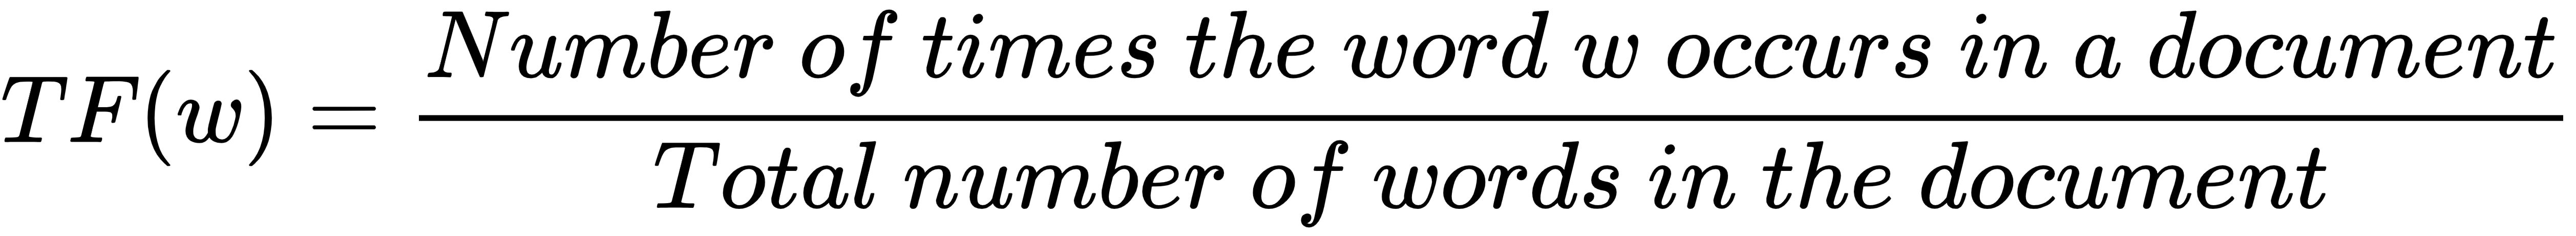

- IDF — это то, что соответствует терминам, которые не так часто встречаются в документах, но могут быть более значимыми для представления документа. Он измеряет важность термина в документе. Использование только терминов перехода придаст больший вес терминам, которые встречаются очень часто. В рамках IDF делается прямо противоположное: веса часто встречающихся терминов подавляются, а веса, возможно, более значимых, но менее часто встречающихся терминов увеличиваются. Как и в случае с TF, существует несколько способов измерения IDF, но наиболее распространенным является следующая формула:

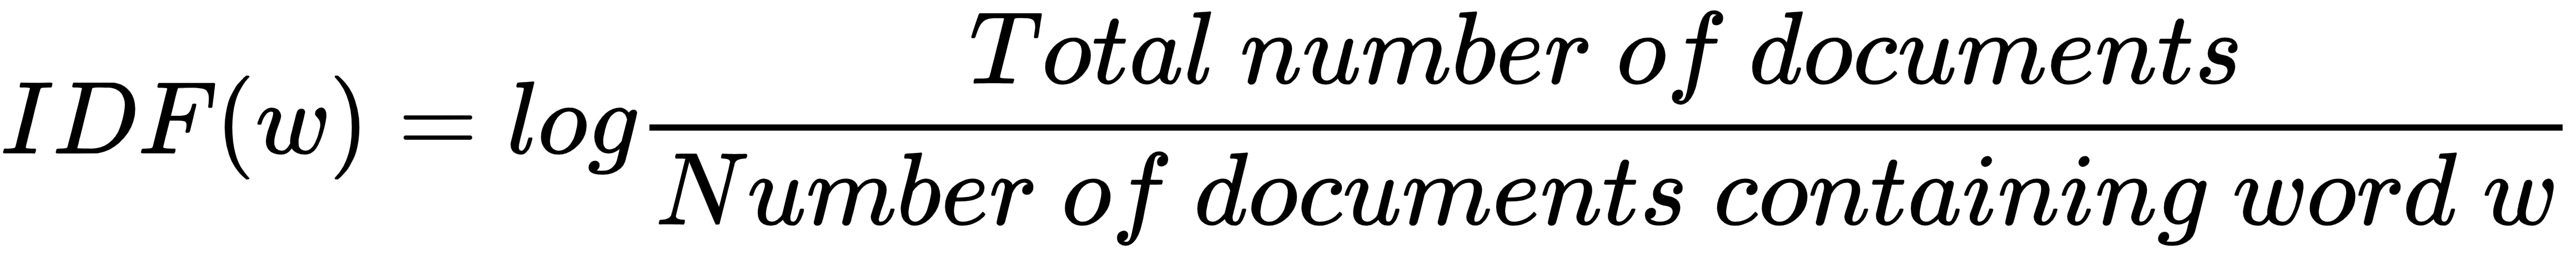

Вес слова w в документе d определяется следующим взвешиванием TF-IDF:

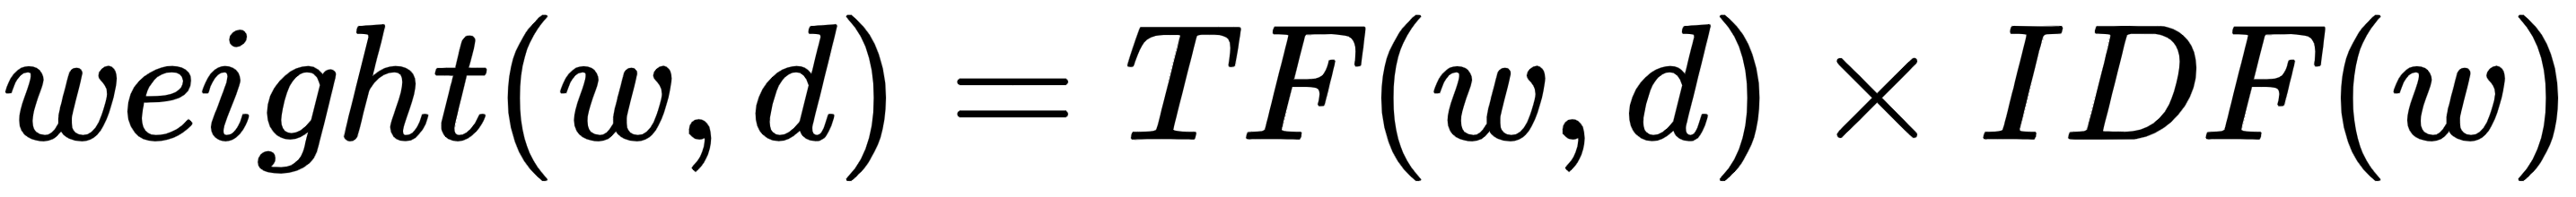

Как можно заметить: вес слова w в документе d является произведением TF слова w в документе d и IDF слова w в текстовом корпусе.

#### Создание базового векторизатора TF-IDF
Базовый векторизатор TF-IDF может быть создан, как показано ниже, в двух шагах. Второй шаг позволяет подгонять данные к векторизатору TF-IDF с последующим преобразованием данных в векторные формы TF-IDF при помощи функции fit_transform:

In [44]:
vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(preprocessed_corpus)

print(vectorizer.get_feature_names_out())
print('\n', tf_idf_matrix.toarray())
print("\nThe shape of the TF-IDF matrix is: ", tf_idf_matrix.shape)

['comprehend' 'computers' 'data' 'everyday' 'evolve' 'field' 'language'
 'make' 'natural' 'process' 'read']

 [[0.         0.         0.         0.         0.         0.
  0.41285857 0.         0.41285857 0.41285857 0.69903033]
 [0.40512186 0.40512186 0.40512186 0.         0.         0.
  0.478543   0.40512186 0.2392715  0.2392715  0.        ]
 [0.         0.         0.         0.49711994 0.49711994 0.49711994
  0.29360705 0.         0.29360705 0.29360705 0.        ]]

The shape of the TF-IDF matrix is:  (3, 11)


Если внимательно посмотреть, то термину 'natural'соответствует третий столбец с конца. Встречается один раз в каждом документе; тем не менее, вес TF-IDF для термина различается в разных документах, потому что даже если IDF останется одинаковым для всех документов для natural, TF будет меняться, поскольку размер каждого документа разный, и компонент TF нормализуется на основе этого. Другая причина этого заключается в том, что каждая строка или вектор нормированы, чтобы иметь единичную норму или длину вектора как 1. В данном примере выбран вариант по умолчанию, который не требует явного указания, что является нормой для  l2, при котором сумма квадратов элементов вектора равна 1.

Давайте посмотрим, как изменится матрица TF-IDF при изменении нормы на l1, а остальные настройки останутся прежними. Сумма абсолютных значений элементов вектора 1 соответствует l1 норме. Следующий блок кода показывает это:

In [47]:
vectorizer_l1_norm = TfidfVectorizer(norm="l1")
tf_idf_matrix_l1_norm = vectorizer_l1_norm.fit_transform(preprocessed_corpus)

print(vectorizer_l1_norm.get_feature_names_out())
print('\n', tf_idf_matrix_l1_norm.toarray())
print("\nThe shape of the TF-IDF matrix is: ", tf_idf_matrix_l1_norm.shape)

['comprehend' 'computers' 'data' 'everyday' 'evolve' 'field' 'language'
 'make' 'natural' 'process' 'read']

 [[0.         0.         0.         0.         0.         0.
  0.21307663 0.         0.21307663 0.21307663 0.3607701 ]
 [0.1571718  0.1571718  0.1571718  0.         0.         0.
  0.1856564  0.1571718  0.0928282  0.0928282  0.        ]
 [0.         0.         0.         0.2095624  0.2095624  0.2095624
  0.12377093 0.         0.12377093 0.12377093 0.        ]]

The shape of the TF-IDF matrix is:  (3, 11)


Матрица TF-IDF изменилась, когда мы изменили норму на l1, как видно из предыдущего фрагмента кода и соответствующего вывода.

Подобно CountVectorizer, векторизатор TF-IDF предлагает возможность использования n-grams и ограничения max_features для нашего словаря. Следующий фрагмент кода показывает то же самое:

In [50]:
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2", analyzer='word', ngram_range=(1,3), max_features = 6)
tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(preprocessed_corpus)
print(vectorizer_n_gram_max_features.get_feature_names_out())
print('\n', tf_idf_matrix_n_gram_max_features.toarray())
print("\nThe shape of the TF-IDF matrix is: ", tf_idf_matrix_n_gram_max_features.shape)

['language' 'language process' 'natural' 'natural language'
 'natural language process' 'process']

 [[0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]
 [0.66666667 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]]

The shape of the TF-IDF matrix is:  (3, 6)


Здесь мы взяли шесть лучших признаков среди униграмм, биграмм и триграмм и использовали их для представления векторов TF-IDF. Векторизатор TF-IDF также предоставляет параметры Min_df и Max_df, и их использование точно такое же, как и в CountVectorizer. Другие функции, предлагаемые векторизатором TF-IDF, включают использование предварительно созданного словаря, токенизацию и удаление стоп-слов.

Векторизатор TF-IDF предлагает улучшение CountVectorizer за счет масштабирования весов менее часто встречающихся терминов, а также за счет использования компонента IDF. Это также быстро в вычислительном отношении. Однако, он по-прежнему опирается на лексический анализ и не принимает во внимание такие вещи, как совместное появление терминов, семантика, контекст, связанный с термины и положение термина в документе. Результат зависит от размера словаря, например CountVectorizer, и будет очень медленным с большими размерами словаря.

### Вычисление расстояния/сходства между векторами документа
Если слова, используемые в двух документах, похожи, это указывает на то, что документы также похожи. Рассмотрим косинусное расстояние (сходство) и используем его, чтобы выяснить, как похожие документы основаны на векторах терминов.

#### Косинусное сходство
Косинусное сходство дает представление об угле между двумя векторами. Два вектора будут похожи, если они достаточно близки по направлению и величине. Мы будем использовать методы, рассмотренные ранее, для построения этих векторов, а затем выясним, насколько они близки или далеки друг от друга, используя косинусное сходство.

Подобие косинуса помогает в измерении косинуса углов между двумя векторами. Значение косинусного сходства будет лежать в диапазоне от -1 до +1. Значение +1 указывает на то, что векторы абсолютно похожи, а значение -1 указывает на то, что векторы совершенно не похожи или точно противоположны друг другу. Как вы понимаете, два документа похожи, если их значения косинусного сходства близки к +1. Кроме того, эти меры подобия всегда находятся между парами документов. Косинусное сходство можно вычислить только для векторов одинакового размера. Формула косинусного подобия для двух векторов A и B выглядит следующим образом:

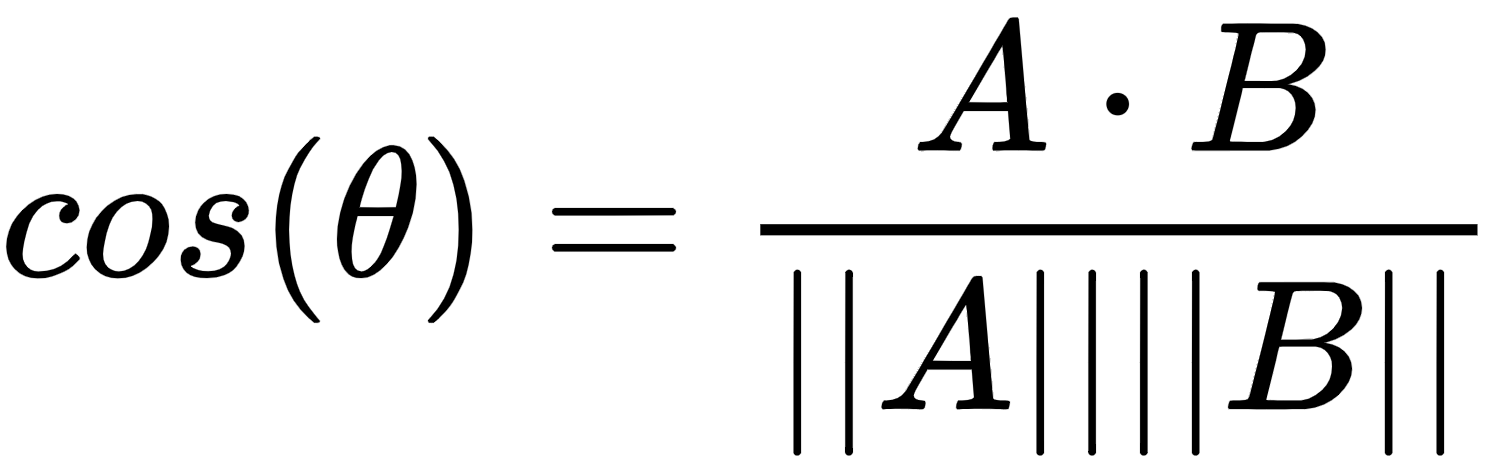

Здесь AB — это скалярное произведение или скалярное произведение двух векторов, а ||А|| и ||Б|| представляют величину этих двух векторов соответственно. Предыдущую формулу также можно представить следующим образом:

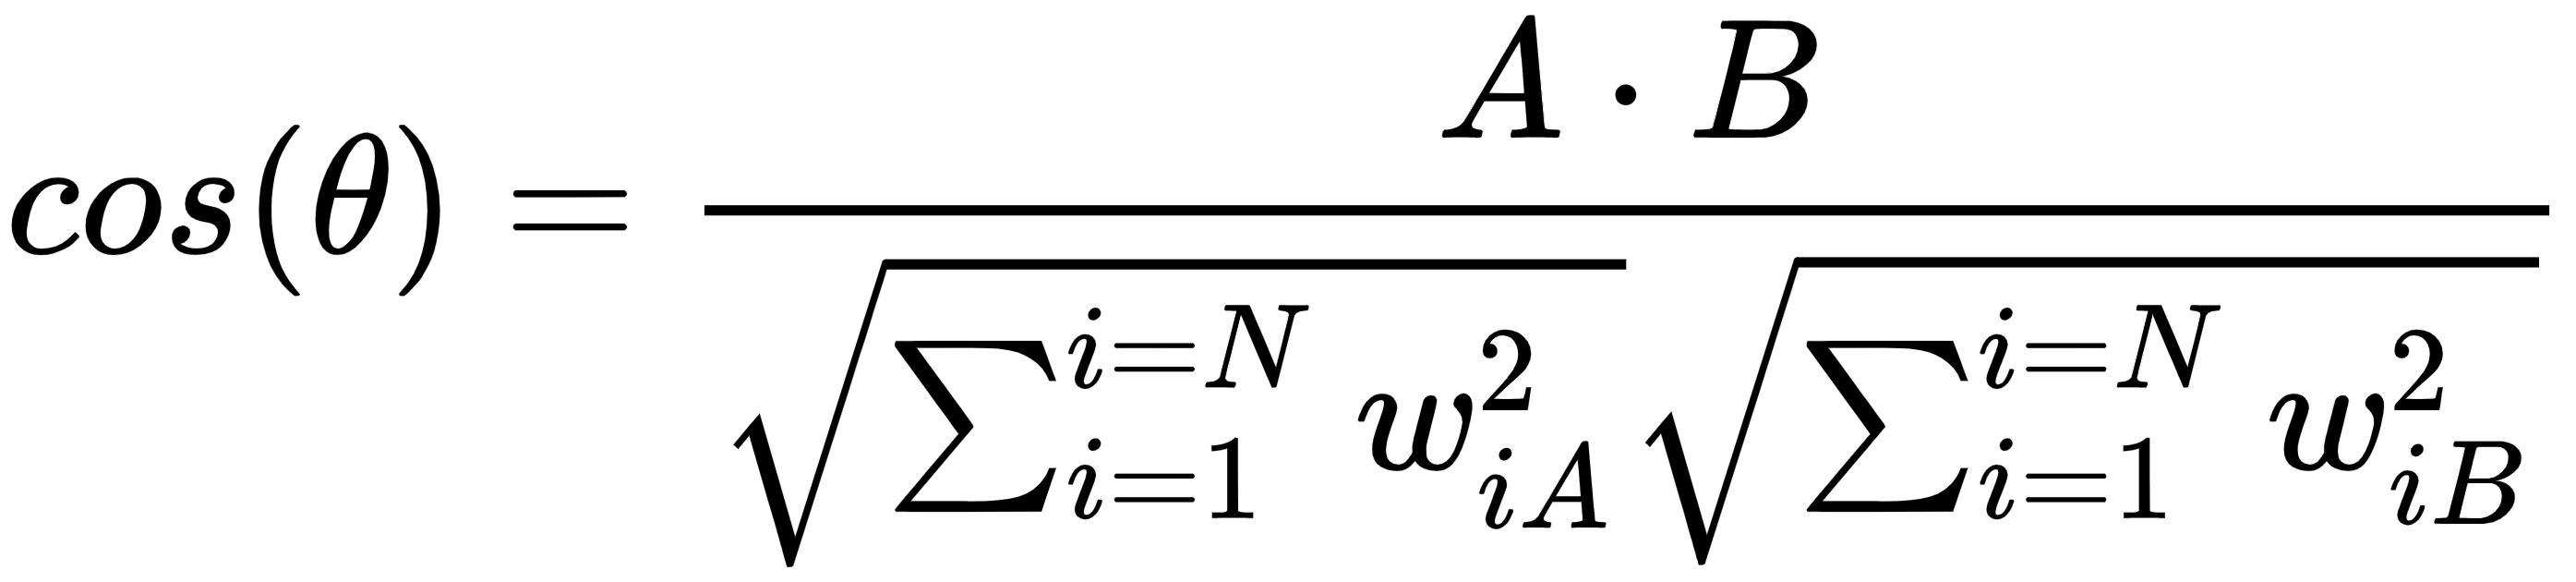

Следующий метод в Python поможет вычислить косинусное сходство между двумя векторами:

In [51]:
def cosine_similarity(vector1, vector2):
    vector1 = np.array(vector1)
    vector2 = np.array(vector2)
    return np.dot(vector1, vector2) / (np.sqrt(np.sum(vector1**2)) * \
                  np.sqrt(np.sum(vector2**2)))

#### Косинусное сходство векторов, разработанных с использованием CountVectorizer
Мы будем использовать bow_matrix, полученный в CountVectorizer, чтобы найти расстояния между документами. В этом нам поможет следующий блок кода:

In [52]:
for i in range(bow_matrix.shape[0]):
    for j in range(i + 1, bow_matrix.shape[0]):
         print("The cosine similarity between the documents ", i, "and", \
                j, "is: ", cosine_similarity(bow_matrix.toarray()[i], \
                bow_matrix.toarray()[j]))

The cosine similarity between the documents  0 and 1 is:  0.6324555320336759
The cosine similarity between the documents  0 and 2 is:  0.6123724356957946
The cosine similarity between the documents  1 and 2 is:  0.5163977794943223


#### Косинусное сходство векторов, вычисленное при помощи инструмента TfIdfVectorizers
Далее мы будем использовать tf-idf матрицу, полученную в TfIdfVectorizer, и вычислим расстояния между документами на её основе следующим образом:

In [53]:
for i in range(tf_idf_matrix.shape[0]):
    for j in range(i + 1, tf_idf_matrix.shape[0]):
        print("The cosine similarity between the documents ", i, "and", \
               j, "is: ", cosine_similarity(tf_idf_matrix.toarray()[i], \
               tf_idf_matrix.toarray()[j]))

The cosine similarity between the documents  0 and 1 is:  0.39514115766749125
The cosine similarity between the documents  0 and 2 is:  0.36365455673761865
The cosine similarity between the documents  1 and 2 is:  0.2810071916500233


### Горячая векторизация
Как правило, однократный вектор используется для представления категориальных переменных, которые принимают значения из предопределенного списка значений. Они помогают в представлении токенов в виде векторов, необходимых в определенных случаях использования. В таких векторах все значения 0, кроме того, где присутствует токен, и эта запись отмечена 1. Это бинарные векторы.

Например, погода может быть представлена как категориальная переменная со значениями hot и cold. В этом сценарии векторы будут следующими:

vec(hot)  = <0, 1>  
vec(cold) = <1, 0>

Здесь два бита: второй бит 1 обозначает hot, а первый бит 1 обозначает cold. Размер вектора таков, что доступны только две возможности с точки зрения горячего и холодного.

В НЛП каждый из терминов, присутствующих в словаре, можно рассматривать как категорию, точно так же, как у нас было две категории для обозначения погодных условий. Теперь всякий раз, когда возникает необходимость представить токен в словаре в виде вектора, он может быть закодирован в горячем режиме. Только один слот в этом векторе, соответствует положению термина в словаре, например значение 1, а остальные будут нулевыми. Размерность этих векторов равна |V|*1, где V — словарь, а |В| обозначает размер словарного запаса.

In [55]:
sentence = ["We are reading about Natural Language Processing Here"]
corpus = pd.Series(sentence)
corpus

0    We are reading about Natural Language Processi...
dtype: object

Данные проходят тот же процесс предварительной обработки, который мы использовали раенее.

In [57]:
# Preprocessing with Lemmatization here
preprocessed_corpus = preprocess(corpus, keep_list = [], stemming = False, stem_type = None,lemmatization = True, remove_stopwords = True)
preprocessed_corpus

['read natural language process']

In [58]:
# создадим словарь
set_of_words = set()
for word in preprocessed_corpus[0].split():
    set_of_words.add(word)
vocab = list(set_of_words)
print(vocab)

['process', 'natural', 'language', 'read']


In [59]:
# создаем горячую матрицу
one_hot_matrix = np.zeros((len(preprocessed_corpus[0].split()), len(vocab)))
one_hot_matrix.shape

(4, 4)

### Создание базового чат-бота

К настоящему времени мы знаем достаточно, чтобы создать базового чат-бота, который можно было бы обучать с использованием предобработанного корпуса и предоставлять ответы на запросы, используя концепции сходства (косинусного расстояния между векторами/текстами). 

Наиболее важным требованием для создания чат-бота является корпус или текстовые данные, на которых будет обучаться чат-бот. Корпус должен быть актуальным и исчерпывающим. Если вы создаете чат-бота для отдела кадров (HR) вашей организации, вам, как правило, потребуется корпус со всеми политиками управления персоналом для обучения бота, а не корпус, содержащий речи президента. Вам также необходимо убедиться, что время отклика является приемлемым и что боту не требуется слишком много времени для ответа. В идеале бот должен выглядеть как человек и иметь приемлемый уровень точности.

Для целей чат-бота, который мы создадим в этом разделе, мы будем использовать данные вопросов и ответов Amazon, которые представляют собой хранилище вопросов и ответов, собранных с веб-сайта Amazon для различных категорий продуктов (http://jmcauley.ucsd.edu/data/amazon/qa/). Поскольку набор данных огромен, мы будем использовать данные вопросов и ответов только для электроники. Пройдя обучение по данным вопросам и ответам, наш чат-бот может быть развернут в качестве автоматизированной службы поддержки вопросов и ответов.

#### Архитектура чат-бота

1. Сохранить все вопросы из корпуса в виде списка.
2. Сохранить все соответствующие ответы из корпуса в списке.
3. Векторизация и предварительная обработка данных вопроса.
4. Векторизация и предварительная обработка запроса пользователя.
5. Оценка вопроса, наиболее похожего на запрос пользователя, используя косинусное сходство.
6. Возврат соответствующего ответа на наиболее похожий вопрос в качестве ответа в чате.

In [11]:
# произведём импорт библиотек:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

import re

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kasutaja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kasutaja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


В качестве первого шага нужно будет импортировать корпус (qa_Electronics.json) в Python. Мы читаем файл как текстовый файл, а затем используем функцию ast библиотеки literal_eval для преобразования строк в словарь Python. Затем мы перебираем каждый словарь, чтобы извлечь и сохранить вопросы и ответы в отдельных списках, как показано в следующем блоке кода:

In [12]:
import ast 
questions = []
answers = [] 
with open('qa_Electronics.json','r') as f:
    for line in f:
        data = ast.literal_eval(line)
        questions.append(data['question'].lower())
        answers.append(data['answer'].lower())

При импорте мы также выполняем этап предварительной обработки преобразования всех символов в нижний регистр. Далее, используя модуль CountVectorizer библиотеки sklearn, мы конвертируем список questions в матрицу и применяем преобразование TF-IDF, как показано в следующем блоке кода:

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(questions)
tfidf = TfidfTransformer(norm='l2')
X_tfidf = tfidf.fit_transform(X_vec)

X_tfidf - это матрица репозитория, поиск которой будет производится каждый раз, когда в чат-бот вводится новый запрос для наиболее похожего вопроса. Чтобы реализовать это, мы создаем функцию для вычисления угла между каждой строкой матрицы X_tfidf и новым вектором вопроса. Мы используем модуль cosine_similarity библиотеки sklearn для вычисления косинуса между каждой строкой и вектором, а затем преобразуем косинус в градусы. Наконец, мы ищем строку с максимальным косинусом (или минимальным углом) с новым вектором вопроса и возвращаем соответствующий ответ на этот вопрос в качестве ответа. Если наименьший угол между вектором вопроса и каждой строкой матрицы больше порогового значения, то мы считаем, что этот вопрос достаточно отличается, чтобы не требовать ответа. Реализация функции показана в следующем блоке кода:

In [14]:
def conversation(im):
    global tfidf, answers, X_tfidf
    Y_vec = vectorizer.transform(im)
    Y_tfidf = tfidf.fit_transform(Y_vec)
    angle = np.rad2deg(np.arccos(max(cosine_similarity(Y_tfidf, \
                       X_tfidf)[0])))
    if angle > 60 :
        return "sorry, I did not quite understand that"
    else:
        return answers[np.argmax(cosine_similarity(Y_tfidf, X_tfidf)[0])]

Наконец, мы реализуем чат, в котором пользователь вводит свое имя пользователя, а затем его приветствует чат-бот. Чат начинается с того, что пользователь задает вопросы, а бот даёт ответ на основе предыдущих функций. Чат продолжается до тех пор, пока пользователь не введет "bye". Реализация функции чата показана в следующем блоке кода:

In [15]:
def main():
    usr = input("Please enter your username: ")
    print("support: Hi, welcome to Q&A support. How can I help you?")
    while True:
        im = input("{}: ".format(usr))
        if im.lower() == 'bye':
            print("Q&A support: bye!")
            break
        else:
            print("Q&A support: "+conversation([im])),

Вот и все. Мы только что создали чат-бота поддержки вопросов и ответов, который отвечает на вопросы, связанные с электронникой, на основе существующего хранилища подобных вопросов и ответов. Ниже приведен пример разговора с чат-ботом, который кажется не таким уж плохим для такой простой реализации:

In [17]:
main()

Please enter your username: buy
support: Hi, welcome to Q&A support. How can I help you?
buy: bye
Q&A support: bye!


В то время как чат-боты, основанные на косинусном сходстве, были приложениями NLP первого поколения, используемыми в промышленности для автоматизации простых задач на основе вопросов и ответов, чат-боты нового поколения прошли долгий путь и могут обрабатывать гораздо более сложные и индивидуальные требования, используя модели, основанные на глубоком обучении. 